In [2]:
#### Crear el programa para hacer uso de la cámara

import cv2

cap = cv2.VideoCapture(0)
location_videofile = 'C:/Users/Adrián Alarcón/Videos/video_taller.avi'

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
codec = cv2.VideoWriter_fourcc('X','V','I','D')

writer = cv2.VideoWriter(location_videofile,codec,fps, (width, height))

while True:
    ret, frame = cap.read()
    writer.write(frame)
    cv2.imshow('frame',frame)

    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

cap.release()
writer.release()
cv2.destroyAllWindows()

In [3]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd

face_detector = FER(mtcnn=True)
input_video = Video(location_videofile)
processing_data = input_video.analyze(face_detector, display = True)

vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

vid_df


INFO:fer:30.00 fps, 441 frames, 14.70 seconds
INFO:fer:Making directories at output
100%|██████████| 441/441 [03:03<00:00,  2.40frames/s]
INFO:fer:Completed analysis: saved to output\video_taller_output.avi
INFO:fer:Starting to Zip
INFO:fer:Compressing: 11%
INFO:fer:Compressing: 22%
INFO:fer:Compressing: 34%
INFO:fer:Compressing: 45%
INFO:fer:Compressing: 56%
INFO:fer:Compressing: 68%
INFO:fer:Compressing: 79%
INFO:fer:Compressing: 90%
INFO:fer:Zip has finished


,angry,disgust,fear,happy,sad,surprise,neutral
0,0.11,0.0,0.19,0.09,0.10,0.03,0.47
1,0.07,0.0,0.17,0.10,0.07,0.01,0.58
2,0.09,0.0,0.26,0.11,0.09,0.01,0.45
3,0.18,0.0,0.23,0.07,0.10,0.03,0.37
4,0.20,0.0,0.08,0.16,0.07,0.01,0.48
...,...,...,...,...,...,...,...
418,0.00,0.0,0.00,0.99,0.00,0.01,0.00
419,0.00,0.0,0.00,0.95,0.00,0.04,0.01
420,0.00,0.0,0.00,0.97,0.00,0.03,0.00
421,0.00,0.0,0.00,0.98,0.00,0.01,0.00


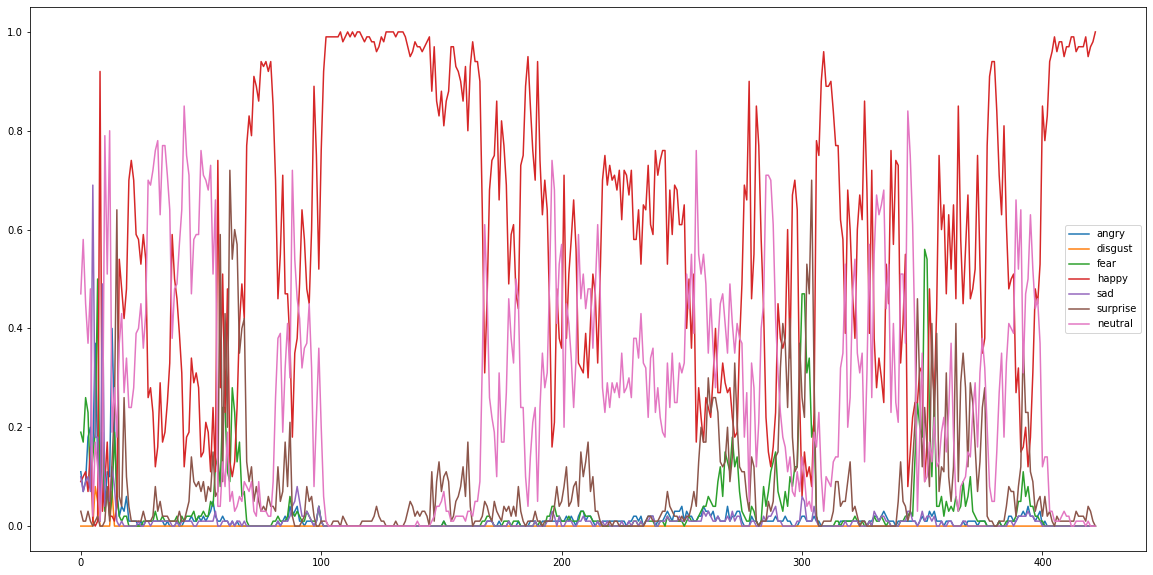

In [5]:
fig = vid_df.plot(figsize = (20,10), fontsize = 10).get_figure()

In [7]:
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['angry','disgust','fear','happy','sad','surprise','neutral']
values = [angry, disgust, fear,happy, sad,surprise,neutral]

score = pd.DataFrame(emotions, columns = ['Emociones humanas'])
score['puntaje'] = values
score

,Emociones humanas,puntaje
0,angry,6.05
1,disgust,0.20
2,fear,15.47
3,happy,248.10
4,sad,5.05
5,surprise,33.78
6,neutral,113.88
